In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 102s 9us/step


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

8


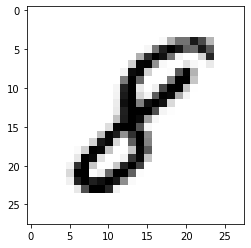

In [3]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [96]:
input_size = 784
output_size = 10
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 1000
    
# define how the model will look like
model = tf.keras.Sequential([
    
    # the first layer (the input layer)
    # each observation is 28x28x1 pixels, therefore it is a tensor of rank 3
    # since we don't know CNNs yet, we don't know how to feed such input into our net, so we must flatten the images
    # there is a convenient method 'Flatten' that simply takes our 28x28x1 tensor and orders it into a (None,) 
    # or (28x28x1,) = (784,) vector
    # this allows us to actually create a feed forward neural network
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), # input layer
    
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

In [97]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=35)

Train on 60000 samples
Epoch 1/35
60000/60000 [==============================] - 41s 690us/sample - loss: 0.2027 - accuracy: 0.9396
Epoch 2/35
60000/60000 [==============================] - 41s 685us/sample - loss: 0.0971 - accuracy: 0.9715
Epoch 3/35
60000/60000 [==============================] - 42s 696us/sample - loss: 0.0718 - accuracy: 0.9788
Epoch 4/35
60000/60000 [==============================] - 43s 720us/sample - loss: 0.0563 - accuracy: 0.9827
Epoch 5/35
60000/60000 [==============================] - 44s 731us/sample - loss: 0.0498 - accuracy: 0.9860
Epoch 6/35
60000/60000 [==============================] - 44s 736us/sample - loss: 0.0390 - accuracy: 0.9892
Epoch 7/35
60000/60000 [==============================] - 44s 735us/sample - loss: 0.0380 - accuracy: 0.9891
Epoch 8/35
60000/60000 [==============================] - 44s 732us/sample - loss: 0.0354 - accuracy: 0.9904
Epoch 9/35
60000/60000 [==============================] - 44s 737us/sample - loss: 0.0276 - accuracy: 0.9

(28, 28, 1)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0 6


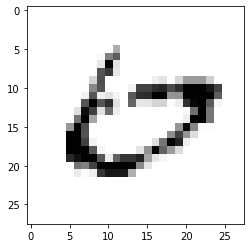

In [50]:
image_index = 445
print(x_test[image_index].shape)
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.round(2))
print(pred.argmax(),y_test[image_index])

7


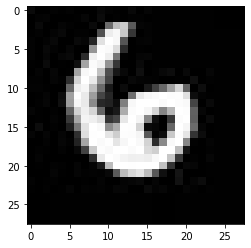

In [119]:
import cv2 as cv
file='rsz_6.jpg'
image = cv.imread(file, cv.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='Greys')
pred = model.predict(image.reshape(1, 28, 28, 1))
print(pred.argmax())

In [58]:

pred=model.predict(image)
print(pred.round(2),pred.argmax())


ValueError: Error when checking input: expected flatten_input to have 4 dimensions, but got array with shape (28, 28)